<a href="https://colab.research.google.com/github/junyong838/Linear-Algebra/blob/main/%EB%B6%93%EA%BD%83%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0/1000 cost:159.07229413684138
33.33333333333333 %
100/1000 cost:40.72061063872496
100.0 %
200/1000 cost:23.82680829318176
100.0 %
300/1000 cost:21.333085100753102
100.0 %
400/1000 cost:18.968103244443206
100.0 %
500/1000 cost:17.633390641692305
100.0 %
600/1000 cost:16.87104717763729
100.0 %
700/1000 cost:16.32752062337104
100.0 %
800/1000 cost:15.906901926821117
100.0 %
900/1000 cost:15.567512230429866
100.0 %


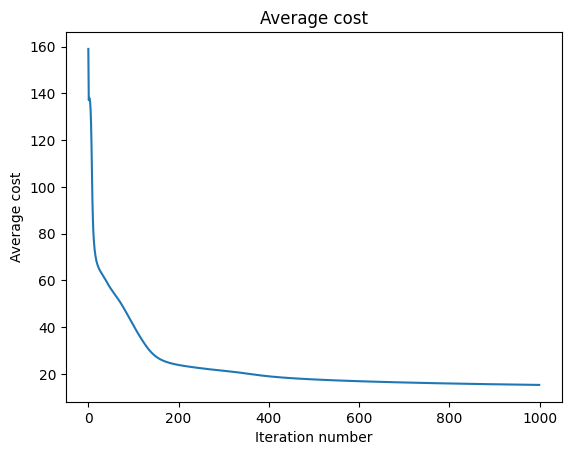

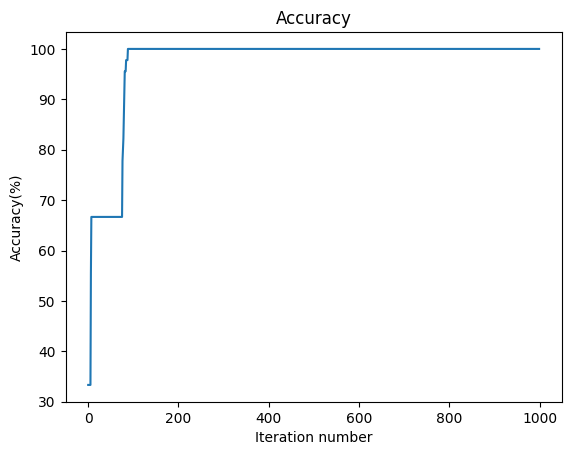

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
iris = np.array(pd.read_csv('/content/drive/MyDrive/선형대수학/archive/Iris.csv'))

Iris_setosa_traindata = iris[:35,1:5]
Iris_versicolor_traindata = iris[50:85, 1:5]
Iris_virginica_traindata = iris[100:135, 1:5]
setosa_y = iris[:35,5]
versicolor_y=iris[50:85,5]
virginca_y=iris[100:135,5]
feature_train = np.concatenate((Iris_setosa_traindata,Iris_versicolor_traindata, Iris_virginica_traindata), axis=0)
species_train = np.concatenate((setosa_y,versicolor_y,virginca_y), axis=0)
X=feature_train.astype(np.float64)
Y = species_train
y_tr = np.zeros((105,3))

Iris_setosa_testdata = iris[35:50,1:5]
Iris_versicolor_testdata = iris[85:100, 1:5]
Iris_virginica_testdata = iris[135:150, 1:5]
setosa_t = iris[35:50,5]
versicolor_t=iris[85:100,5]
virginca_t=iris[135:150,5]
feature_test = np.concatenate((Iris_setosa_testdata,Iris_versicolor_testdata, Iris_virginica_testdata),axis=0).astype(np.float64)
species_test = np.concatenate((setosa_t,versicolor_t,virginca_t),axis=0)
Y_t = species_test
test_s = np.zeros((45,3))

learning_rate=0.05
W1=np.random.random((4,4))*0.1
W2=np.random.random((3,4))*0.1
b1=np.random.random(4)*0.1
b2=np.random.random(3)*0.1
for x in range(105):
    if Y[x]=='Iris-setosa':
      y_tr[x,0] = 1
    elif Y[x]=='Iris-versicolor':
      y_tr[x,1] = 1
    elif Y[x]=='Iris-virginica':
      y_tr[x,2] = 1
for x in range(45):
    if Y_t[x]=='Iris-setosa':
      test_s[x,0] = 1
    elif Y_t[x]=='Iris-versicolor':
      test_s[x,1] = 1
    elif Y_t[x]=='Iris-virginica':
      test_s[x,2] = 1

def sigmoid(x):
  return 1/(1+np.exp(-x))
def sigmoid_derivative(x):
  return sigmoid(x)*(1-sigmoid(x))
def softmax(x):
  x = np.exp(x)
  sum = np.sum(x)
  return x/sum
def softmax_derivative(a, z):
  return a-z
def feed_forward(x,W1,W2,b1,b2):
  a1 = x.astype(np.float64)
  z2=np.dot(W1, a1)+b1
  a2 = sigmoid(z2)

  z3=np.dot(W2, a2)+b2
  a3 = softmax(z3)

  return a1, a2, a3, z2, z3
def accuracy():
  acc = 0
  acc_count = 0
  for tx,ty in zip(feature_test,test_s):
    a1,a2,ta3,z2,z3=feed_forward(tx,W1,W2,b1,b2)
    label = np.argmax(ty, axis=0)
    Y_predict = np.argmax(ta3, axis=0)
    if label == Y_predict:
      acc += 1
    acc_count +=1
  return acc/acc_count*100

count=0
max_iteration=1000
dataset_size=len(Y)
list_average_cost=[]
list_accuracy=[]
while count < max_iteration:
  dW2=np.zeros((3,4))
  dW1=np.zeros((4,4))
  db2=np.zeros(3)
  db1=np.zeros(4)
  average_cost=0
  for x,y in zip(X,y_tr):

    a1,a2,a3,z2,z3=feed_forward(x,W1,W2,b1,b2)
    average_cost += -1 * np.log(np.sum(np.dot(a3, y)))
    delta3=softmax_derivative(a3, y)
    delta2=np.dot(W2.T,delta3)*sigmoid_derivative(z2)
    dW2 += np.dot(delta3[:,np.newaxis], np.transpose(a2[:,np.newaxis]))/dataset_size
    db2+=delta3/dataset_size
    dW1 +=np.dot(delta2[:,np.newaxis],np.transpose(a1[:,np.newaxis]))/dataset_size
    db1+=delta2/dataset_size

    W2+= -learning_rate*dW2
    b2+= -learning_rate*db2
    W1+= -learning_rate*dW1
    b1+= -learning_rate*db1

  acc = accuracy()
  list_average_cost.append(average_cost)
  list_accuracy.append(acc)
  if count%100 == 0:
    print('{}/{} cost:{}'.format(count,max_iteration,average_cost))
    print(acc,"%")

  count+=1
plt.figure(1)
plt.title('Average cost')
plt.plot(list_average_cost)
plt.ylabel('Average cost')
plt.xlabel('Iteration number')
plt.figure(2)
plt.title('Accuracy')
plt.plot(list_accuracy)
plt.ylabel('Accuracy(%)')
plt.xlabel('Iteration number')
plt.show()